In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from ipyleaflet import Map, basemaps, Marker

In [21]:
ds = pd.read_csv('./assets/real_estate.csv',sep=';')

In [22]:
pd.set_option('display.max_columns', 37)

In [23]:
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,¡¡¡IDEAL PROFESIONALES E INVERSORES¡¡¡ \nINFOC...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,"Planta baja con cocinas, una de ellos posibili...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,NaN,Torrelodones,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,"Piso de 3 dormitorios con armarios empotrados,...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velill

In [24]:
#Exercise 01. Which is the most expensive house in the dataset?

most_expensive = ds.loc[13110, 'price']
most_exp_address = ds.loc[13110, 'address']

print(f"The house with address {most_exp_address} is the most expensive and its price is {most_expensive} USD.")

The house with address El Escorial is the most expensive and its price is 8500000 USD.


In [25]:
#Exercise 02. Which is cheapest house in the dataset?

least_expensive = ds.loc[8183, 'price']
least_exp_address = ds.loc[8183, 'address']

print(f"The house with address {least_exp_address} is the cheapest and its price is {least_expensive} USD.")

The house with address Avenida de Los Pirineos, 33, San Sebastián de los Reyes is the cheapest and its price is 0 USD.


In [26]:
#Exercise 03. Which is the biggest and the smallest house in the dataset?

biggest_house = ds.loc[6794, 'surface']
smallest_house = ds.loc[8111, 'surface']
biggest_house_add = ds.loc[6794, 'address']
smallest_house_add = ds.loc[8111, 'address']

print(f"The bigger house is located on {biggest_house_add} and its surface is {biggest_house} meters.")

print(f"The smaller house is located on {smallest_house_add} and its surface is {smallest_house} meters.")


The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters.
The smaller house is located on Calle Goya, 2, Brunete and its surface is nan meters.


In [27]:
#Exercise 04. How many populations (level5 column) the dataset contains?

populations = ds['level5'].unique()

print(populations)

['Arganda del Rey' 'Fuenlabrada' 'Boadilla del Monte'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

In [28]:
#Exercise 05. Does the dataset contain NAs?

ds_nan_values = ds.isna()
ds_nan_values

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [29]:
#Exercise 06. Delete the NAs of the dataset, if applicable

dropped_na = ds.dropna(axis='columns', how='any')
after_drop_dimensions = dropped_na.shape
before_drop_dimensions = ds.shape

print(f"Before dropping the NA's the dimensions are {before_drop_dimensions} and after they are {after_drop_dimensions}.")

Before dropping the NA's the dimensions are (15335, 37) and after they are (15335, 25).


In [30]:
#Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"?

filt = ds['level5'] == 'Arroyomolinos (Madrid)'
dropped_na.loc[filt]['price'].mean()

294541.59854014596

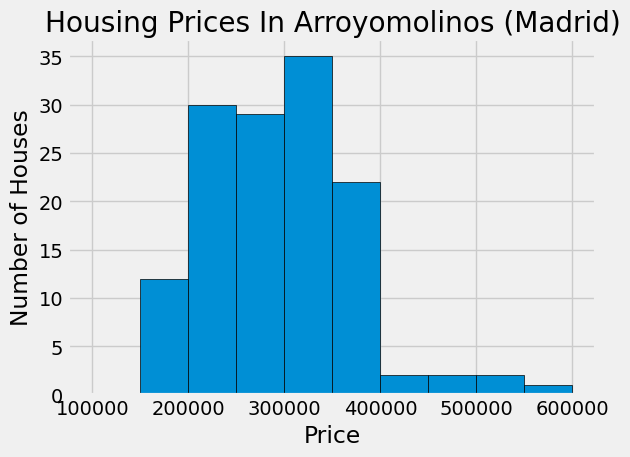

In [31]:
#Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe

plt.style.use('fivethirtyeight')

housing_data = pd.read_csv('./assets/real_estate.csv',sep=';')

pop_arroyo = ds[ds['level5'].isin(["Arroyomolinos (Madrid)"])]
madrid_prices = pop_arroyo['price']

bins = [100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]

plt.hist(madrid_prices, bins=bins, edgecolor='black')

plt.title('Housing Prices In Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Number of Houses')

plt.tight_layout()

plt.show()

# After observing this chart, it seems like majority of the homes in this population fall 
# under a small range creating a ton of competition.


In [32]:
#Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same?

population_grp = dropped_na.groupby(['level5'])
avg_galapagar_price = population_grp['price'].mean().loc['Galapagar']
avg_valdemorillo_price = population_grp['price'].mean().loc['Valdemorillo']
print(f"The average price for real estate is slightly higher in Valdemorillo at {avg_valdemorillo_price} than it is in Galapagar at {avg_galapagar_price}.")

The average price for real estate is slightly higher in Valdemorillo at 363860.2931034483 than it is in Galapagar at 360063.20238095237.


In [33]:
#Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same?
# ***When researching the source of the data, it looked like the surface data was already in meters squared***

ds['pps'] = ds['price'] / ds['surface']

valdemorillo_city = ds['level5'] == 'Valdemorillo'
avg_surface_valdemorillo = ds.loc[valdemorillo_city]['surface'].mean()
valdemorillo_ppsm = avg_valdemorillo_price / avg_surface_valdemorillo

galapagar_city = ds['level5'] == 'Galapagar'
avg_surface_galapagar = ds.loc[galapagar_city]['surface'].mean()
galapagar_ppsm = avg_galapagar_price / avg_surface_galapagar

print(f"The average price per square meter is lower in Valdemorillo at {valdemorillo_ppsm} than it is in Galapagar at {galapagar_ppsm}.")

The average price per square meter is lower in Valdemorillo at 1039.5447972876266 than it is in Galapagar at 1178.5257998852853.


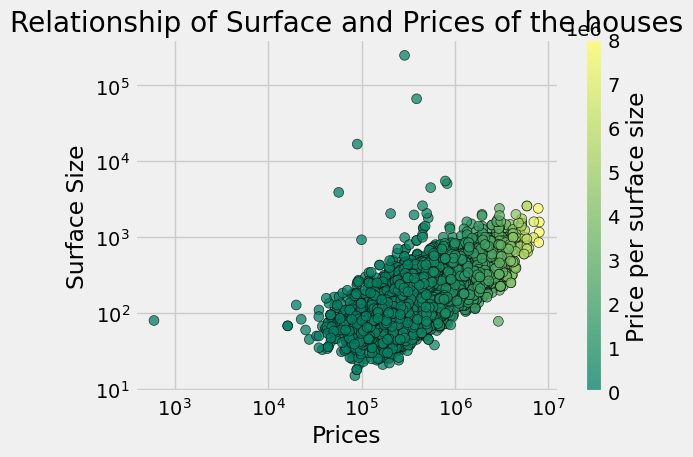

In [34]:
#Exercise 11. Analyse the relation between the surface and the price of the houses

plt.style.use('fivethirtyeight')

new_data = ds.dropna(subset='surface')
surface = new_data['surface']
prices = new_data['price']

plt.scatter(prices, surface, s=50, c=prices, cmap='summer', edgecolor='black', linewidth=.5, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price per surface size')

plt.xscale('log')
plt.yscale('log')

plt.title('Relationship of Surface and Prices of the houses')

plt.xlabel('Prices')
plt.ylabel('Surface Size')

plt.tight_layout()

plt.show()

# This shows that majority of the properties increase in price as they offer more land 
# however there are a number of outliers that offer a significant amount of more land for a much less
# significant price.

In [35]:
#Exercise 12. How many real estate agencies the dataset contains?

num_agencies = ds['realEstate_name'].value_counts().sum()

print(f"There are {num_agencies} real estate agencies in the dataset.")

There are 15325 real estate agencies in the dataset.


In [36]:
#Exercise 13. Which is the population (level5 column) that contains the most houses?

mst_num_houses_pop = ds['level5'].value_counts()
mst_num_houses_pop1 = mst_num_houses_pop.loc[' Madrid Capital']

pop_city = ds[ds['level5'].isin([' Madrid Capital'])]

mst_houses = pop_city.loc[[9],['level5']]
mst_houses_pop = mst_houses.iloc[0, 0]
mst_houses_pop

print(f"The population with the most houses is {mst_houses_pop} in the amount of {mst_num_houses_pop1}.")

The population with the most houses is  Madrid Capital in the amount of 6643.


In [37]:
#Exercise 14. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón"

south_belt = ds[ds['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,...,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",...,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",...,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",...,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",...,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",...,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,"Piso en Fuenlabrada, Madrid. Dispone de una su...","Urbanización Urbanización Parque Miraflores, 5...",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",...,Loranca,NaN,Loranca,0,0,0,0,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,"QUIERES VIVIR EN PLENO CENTRO, a tan sólo 2 m...",Leganés,España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",...,Centro de Leganés,NaN,Centro de Leganés,0,0,0,0,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,JADEIN FERRERO S.L vende excelente vivienda en...,Fuenlabrada,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",...,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,0,0,0,0,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´SI...,"Calle Dr. Miguel de Aguado, Fuenlabrada",España,Madrid,Madrid,Zona Sur

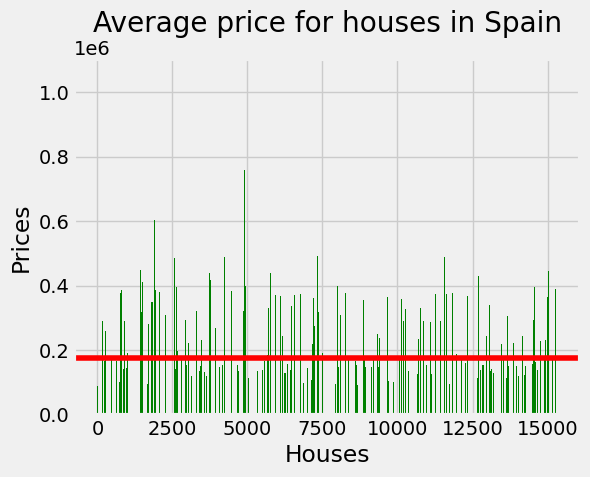

In [38]:
#Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14)

plt.style.use('fivethirtyeight')

# Removed the NA's from the price column
median_data = south_belt.dropna(subset='price')

# Removed the rows that had zeros in the price column
median_data= median_data[median_data['price'] != 0]

# Found the median price
price_median = median_data['price'].median()

all_prices = median_data['price']

X = list(median_data.iloc[:, 0])
Y = list(median_data.iloc[:, 9])

plt.bar(X, Y, width=10, color='green')

# Plotting a horizontal line showing the median price
plt.axhline(price_median, color='red', label='price median')


plt.title('Average price for houses in Spain')

plt.xlabel('Houses')
plt.ylabel('Prices')

plt.tight_layout()

plt.show()

# There are a few spikes where there is a large discrepancy between the prices and a few outliers that are far 
# more expensive than the neighboring houses.

In [39]:
#Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14)

price_variance = south_belt['price'].var()
rooms_variance = south_belt['rooms'].var()
surface_variance = south_belt['surface'].var()
bathroom_variance = south_belt['bathrooms'].var()

price_mean = south_belt['price'].mean()
rooms_mean = south_belt['rooms'].mean()
surface_mean = south_belt['surface'].mean()
bathroom_mean = south_belt['bathrooms'].mean()

print(f"Price has a mean of {price_mean} and a variance of {price_variance}")
print(f"Rooms has a mean of {rooms_mean} and a variance of {rooms_variance}")
print(f"Surface has a mean of {surface_mean} and a variance of {surface_variance}")
print(f"Bathrooms has a mean of {bathroom_mean} and a variance of {bathroom_variance}")



Price has a mean of 223094.48070562293 and a variance of 14921367508.04902
Rooms has a mean of 3.0177383592017737 and a variance of 0.7188858892927542
Surface has a mean of 111.75222363405337 and a variance of 4263.051760316337
Bathrooms has a mean of 1.633221850613155 and a variance of 0.5717968625577321


In [40]:
# Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14

most_exp_fuenlabrada = south_belt[south_belt['level5'].isin(["Fuenlabrada"])]
mst_exp_row = most_exp_fuenlabrada['price'].nlargest(1)
mst_exp_price_fuenlabrada = mst_exp_row.iloc[0]
add1 = most_exp_fuenlabrada.loc[11561, 'address']

print(f"The most expensive house in Fuenlabrada cost {mst_exp_price_fuenlabrada} with an address of {add1}.")

most_exp_leganés = south_belt[south_belt['level5'].isin(["Leganés"])]
mst_exp_row2 = most_exp_leganés['price'].nlargest(1)
mst_exp_price_leganés = mst_exp_row2.iloc[0]
add2 = most_exp_leganés.loc[10412, 'address']

print(f"The most expensive house in Leganés cost {mst_exp_price_leganés} with an address of {add2}.")


most_exp_getafe = south_belt[south_belt['level5'].isin(["Getafe"])]
mst_exp_row3 = most_exp_getafe['price'].nlargest(1)
mst_exp_price_getafe = mst_exp_row3.iloc[0]
add3 = most_exp_getafe.loc[2881, 'address']

print(f"The most expensive house in Getafe cost {mst_exp_price_getafe} with an address of {add3}.")


most_exp_alcorcón = south_belt[south_belt['level5'].isin(["Alcorcón"])]
mst_exp_row4 = most_exp_alcorcón['price'].nlargest(1)
mst_exp_price_alcorcón = mst_exp_row4.iloc[0]
add4 = most_exp_alcorcón.loc[5585, 'address']

print(f"The most expensive house in Alcorcón cost {mst_exp_price_alcorcón} with an address of {add4}.")

The most expensive house in Fuenlabrada cost 490000 with an address of Calle de Paulo Freire, 5, Fuenlabrada.
The most expensive house in Leganés cost 650000 with an address of Avenida Reina Sofía, Leganés.
The most expensive house in Getafe cost 1050000 with an address of Getafe.
The most expensive house in Alcorcón cost 950000 with an address of Alcorcón.


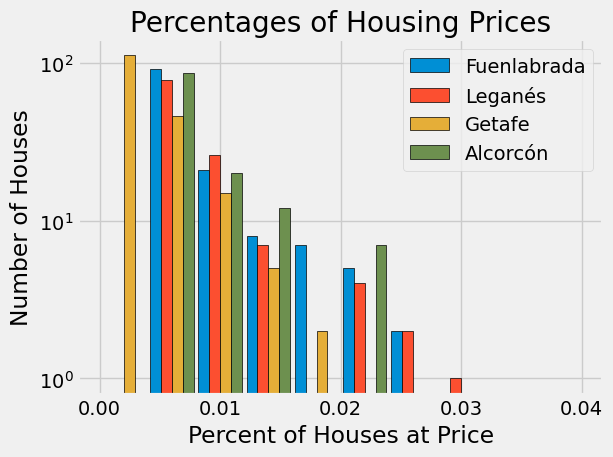

In [41]:
#Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14)

plt.style.use('fivethirtyeight')

norm_price_data_fuenlabrada = most_exp_fuenlabrada['price'].value_counts(normalize=True)

norm_price_data_leganés = most_exp_leganés['price'].value_counts(normalize=True)

norm_price_data_getafe = most_exp_getafe['price'].value_counts(normalize=True)

norm_price_data_alcorcón = most_exp_alcorcón['price'].value_counts(normalize=True)


bins = [0, .004, .008, .012, .016, .020, .024, .028, .032, .036, .040]

plt.hist([norm_price_data_fuenlabrada, norm_price_data_leganés, norm_price_data_getafe, norm_price_data_alcorcón], 
         bins=bins, edgecolor='black', rwidth=0.9, log=True, label=['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])


plt.title('Percentages of Housing Prices')
plt.xlabel('Percent of Houses at Price')
plt.ylabel('Number of Houses')

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

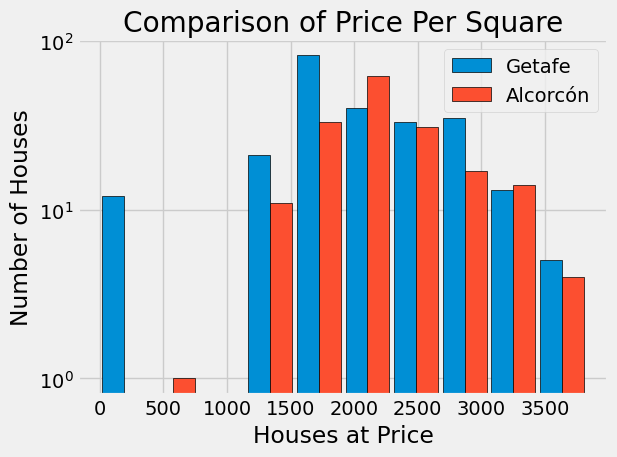

In [42]:
#Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 

plt.style.use('fivethirtyeight')

getafe_city = south_belt['level5'] == 'Getafe'
getafe_pps = south_belt.loc[getafe_city]['pps']

alcorcon_city = south_belt['level5'] == 'Alcorcón'
alcorcon_pps = south_belt.loc[alcorcon_city]['pps']

plt.hist([getafe_pps, alcorcon_pps], edgecolor='black', rwidth=0.9, log=True, label=['Getafe', 'Alcorcón'])

plt.title('Comparison of Price Per Square')
plt.xlabel('Houses at Price')
plt.ylabel('Number of Houses')

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

# Getafe seems to be the larger city with more houses at almost all price levels. Getafe also sells for more per
# square in most categories of price. Overall it will likely cost you more to move into Getafe than Alcoron for
# the same size house.

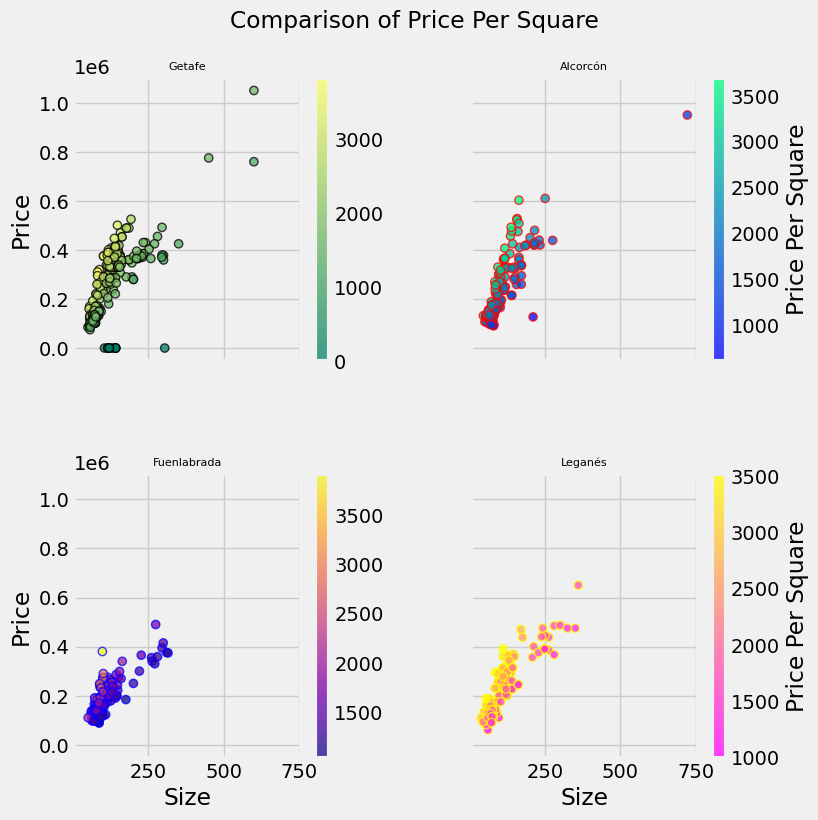

In [43]:
#Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14

plt.style.use('fivethirtyeight')

getafe_city = south_belt['level5'] == 'Getafe'
getafe_pps = south_belt.loc[getafe_city]['pps']
getafe_prices = south_belt.loc[getafe_city]['price']
getafe_surfaces = south_belt.loc[getafe_city]['surface']

alcorcon_city = south_belt['level5'] == 'Alcorcón'
alcorcon_pps = south_belt.loc[alcorcon_city]['pps']
alcorcon_prices = south_belt.loc[alcorcon_city]['price']
alcorcon_surfaces = south_belt.loc[alcorcon_city]['surface']

fuenlabrada_city = south_belt['level5'] == 'Fuenlabrada'
fuenlabrada_pps = south_belt.loc[fuenlabrada_city]['pps']
fuenlabrada_prices = south_belt.loc[fuenlabrada_city]['price']
fuenlabrada_surfaces = south_belt.loc[fuenlabrada_city]['surface']

leganés_city = south_belt['level5'] == 'Leganés'
leganés_pps = south_belt.loc[leganés_city]['pps']
leganés_prices = south_belt.loc[leganés_city]['price']
leganés_surfaces = south_belt.loc[leganés_city]['surface']


main_plot = fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8.5, 8.5))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


getafe_plot = ax1.scatter(getafe_surfaces, getafe_prices, c=getafe_pps, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75, label='Getafe')

alcorcon_plot = ax2.scatter(alcorcon_surfaces, alcorcon_prices, c=alcorcon_pps, cmap='winter', edgecolor='red', linewidth=1, alpha=0.75, label='Alcorcón')

fuenlabrada_plot = ax3.scatter(fuenlabrada_surfaces, fuenlabrada_prices, c=fuenlabrada_pps, cmap='plasma', edgecolor='blue', linewidth=1, alpha=0.75, label='Fuenlabrada')

leganés_plot = ax4.scatter(leganés_surfaces, leganés_prices, c=leganés_pps, cmap='spring', edgecolor='yellow', linewidth=1, alpha=0.75, label='Leganés')



cbar = plt.colorbar(getafe_plot, ax=ax1)

cbar = plt.colorbar(alcorcon_plot, ax=ax2)
cbar.set_label('Price Per Square')

cbar = plt.colorbar(fuenlabrada_plot, ax=ax3)

cbar = plt.colorbar(leganés_plot, ax=ax4)
cbar.set_label('Price Per Square')


fig.suptitle('Comparison of Price Per Square')

ax1.set_title('Getafe', fontsize=8)
ax1.set_ylabel('Price')

ax2.set_title('Alcorcón', fontsize=8)

ax3.set_title('Fuenlabrada', fontsize=8)
ax3.set_xlabel('Size')
ax3.set_ylabel('Price')

ax4.set_title('Leganés', fontsize=8)
ax4.set_xlabel('Size')


plt.show()

In [44]:
# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude

map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [46]:
#convert to float
#replace commas with 
south_belt["latitude"] = south_belt["latitude"].str.replace(',', '.').astype(float)
south_belt["longitude"] = south_belt["longitude"].str.replace(',', '.').astype(float)

for (index, row) in south_belt.iterrows():
    marker = Marker(location=[row.loc['latitude'], row.loc['longitude']],
                   title=str(row.loc['id_realEstates']) + ' ' + row.loc['country'])
    map.add_layer(marker)
    
map

/tmp/ipykernel_6567/1667814975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt["latitude"] = south_belt["latitude"].str.replace(',', '.').astype(float)
/tmp/ipykernel_6567/1667814975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt["longitude"] = south_belt["longitude"].str.replace(',', '.').astype(float)


Map(bottom=2147.0, center=[8.841651120809145, 22.851562500000004], controls=(ZoomControl(options=['position', …